In [65]:
import pandas as pd

In [66]:
data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')

C:\Users\estre\AppData\Local\Temp\ipykernel_3320\1027246833.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')


In [67]:
data

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


### Información de las clases

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


### Desbalanceo de las clases

In [69]:
len(data[data['class']=='S'])

5560

In [70]:
len(data[data['class']=='B'])

9476

Hay un desbalencio de las clases, hay más app que no son malware. 

### Codificación de la variable 'class'

In [71]:
class_maping={'B':0, 'S':1}
data['class'] = data['class'].map(class_maping)

In [72]:
data

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


### Búscamos cual es la otra variable tipo object

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(215), object(1)
memory usage: 24.8+ MB


In [74]:
columnas_object = data.select_dtypes(include='object').columns
print("Columnas de tipo 'object':")
print(columnas_object)

Columnas de tipo 'object':
Index(['TelephonyManager.getSimCountryIso'], dtype='object')


### Vemos que valores toma

In [75]:
data['TelephonyManager.getSimCountryIso'].unique()

array(['0', '1', '?', 1, 0], dtype=object)

Viendo el carácter de esta variable podemos eliminar y ver que resultados obtenemos. Por si la necesitamos se guardará en una variable

In [76]:
data_variable_strange = data['TelephonyManager.getSimCountryIso']

In [77]:
data = data.drop(columns='TelephonyManager.getSimCountryIso')

#### Comprobamos que todas las variables son numéricas

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 215 entries, transact to class
dtypes: int64(215)
memory usage: 24.7 MB


Hipótesis: todas las variables que tenemos en nuestro conjunto de datos son categóricas

In [79]:
data.nunique()

transact                      2
onServiceConnected            2
bindService                   2
attachInterface               2
ServiceConnection             2
                             ..
ACCESS_FINE_LOCATION          2
SET_WALLPAPER_HINTS           2
SET_PREFERRED_APPLICATIONS    2
WRITE_SECURE_SETTINGS         2
class                         2
Length: 215, dtype: int64

In [80]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.nunique())

transact                                           2
onServiceConnected                                 2
bindService                                        2
attachInterface                                    2
ServiceConnection                                  2
android.os.Binder                                  2
SEND_SMS                                           2
Ljava.lang.Class.getCanonicalName                  2
Ljava.lang.Class.getMethods                        2
Ljava.lang.Class.cast                              2
Ljava.net.URLDecoder                               2
android.content.pm.Signature                       2
android.telephony.SmsManager                       2
READ_PHONE_STATE                                   2
getBinder                                          2
ClassLoader                                        2
Landroid.content.Context.registerReceiver          2
Ljava.lang.Class.getField                          2
Landroid.content.Context.unregisterReceiver   

Se reafirma nuestra hipótesis, por lo que, no tenemos que analizar si nuestro conjunto de datos tiene outliers. Lo que si que deberíamos ver si hay datos faltantes.

#### Datos faltantes

In [81]:
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Columnas con valores nulos:")
print(columns_with_missing_values)

Columnas con valores nulos:
Series([], dtype: int64)


Por lo que se puede apreciar no hay datos faltantes en el conjunto de datos. 

Como nuestras variables son todas categóricas no se tiene que normalizar nuestro conjunto de datos.

#### Duplicados

In [82]:
data.duplicated().sum()

7786

Se deberían de eleminar los datos que están duplicados. Por lo que, vamos a hacerlo. Pero deberíamos tener en cuenta que a lo mejor no son duplicados, sino diferentes apps que contienen la misma información. Por lo que se recomienta hacer un análisis posteriori con todo el número de observaciones.

In [83]:
data = data.drop_duplicates()
print("Número de duplicados después de eliminar:", data.duplicated().sum())

Número de duplicados después de eliminar: 0


In [84]:
len(data[data['class']==0])

5530

In [85]:
len(data[data['class']==1])

1720

#### Técnica de filtro (Chi square)

In [86]:
labels = data['class']
features = data.drop(columns='class')

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k = 6  
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(features, labels)

mask = selector.get_support()

selected_features = [feature for feature, selected in zip(features.columns, mask) if selected]

print("Características seleccionadas:", selected_features)

Características seleccionadas: ['transact', 'onServiceConnected', 'bindService', 'attachInterface', 'ServiceConnection', 'WRITE_HISTORY_BOOKMARKS']


In [88]:
data_chi_square = data[selected_features]
data_chi_square['class'] = data['class']
data_chi_square.head()

C:\Users\estre\AppData\Local\Temp\ipykernel_3320\2375019664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chi_square['class'] = data['class']


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,WRITE_HISTORY_BOOKMARKS,class
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,1,1


Entrenamiento de los modelos

Primero obtenemos el conjunto de entrenamiento y prueba.

In [89]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_chi_square, test_size=0.2, random_state=123)

Contruimos un conjunto de entrenamiento balanceado

In [90]:
from sklearn.utils import resample
clase_0 = train_data[train_data['class']== 0]
clase_1 = train_data[train_data['class']== 1]
# Submuestrea la clase sobrerrepresentada (en este caso, la clase 0).
class_0_subsampled = resample(clase_0, replace=False, n_samples=len(clase_1), random_state=123)

# Combina las clases equitativamente.
data_train = pd.concat([clase_1, class_0_subsampled])

In [91]:
len(data_train[data_train['class']==0])

1372

In [92]:
len(data_train[data_train['class']==1])

1372

In [93]:
labels_train = data_train['class']
features_train = data_train.drop(columns='class')
labels_test = test_data['class']
features_test = test_data.drop(columns='class')

#### Implementamos cuántica

In [94]:
!pip install pylatexenc

In [95]:
!pip install openpyxl

In [96]:
!pip install qiskit

Implementamos el SVC

In [97]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()
_ = svc.fit(features_train, labels_train)  

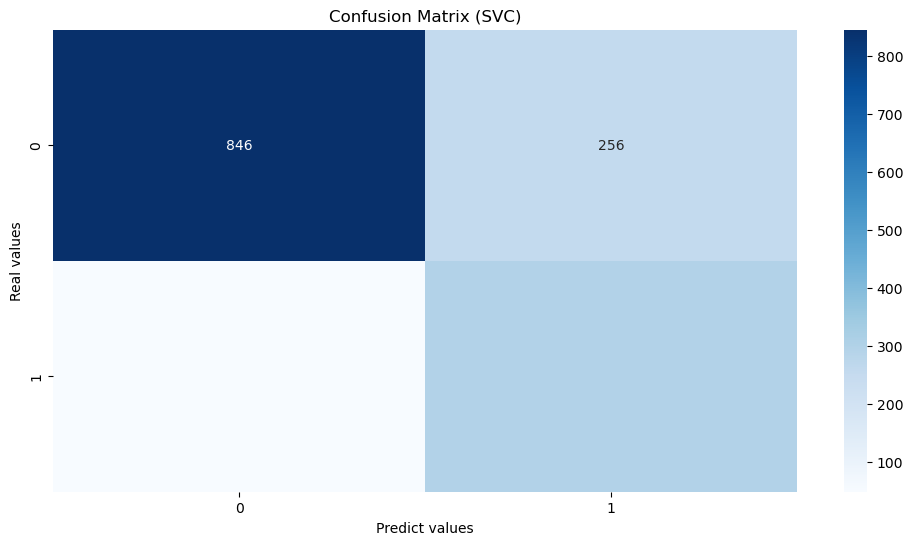

In [98]:
predictions = svc.predict(features_test)
import matplotlib.pyplot as plot
import seaborn as sns
confusion = confusion_matrix(labels_test, predictions)
sns.heatmap(confusion, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (SVC)")
plot.show()

In [99]:
train_score_c4 = svc.score(features_train, labels_train)
test_score_c4 = svc.score(features_test, labels_test)


print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.80
Classical SVC on the test dataset:     0.79


In [100]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions,digits=6))

              precision    recall  f1-score   support

           0   0.946309  0.767695  0.847695      1102
           1   0.539568  0.862069  0.663717       348

    accuracy                       0.790345      1450
   macro avg   0.742939  0.814882  0.755706      1450
weighted avg   0.848691  0.790345  0.803541      1450



VQC

In [40]:
features = data_chi_square.drop(columns='class')

In [41]:
num_features = features.shape[1]

## SPSA

In [42]:
from qiskit_algorithms.optimizers import SPSA
optimizer = SPSA(maxiter=100)

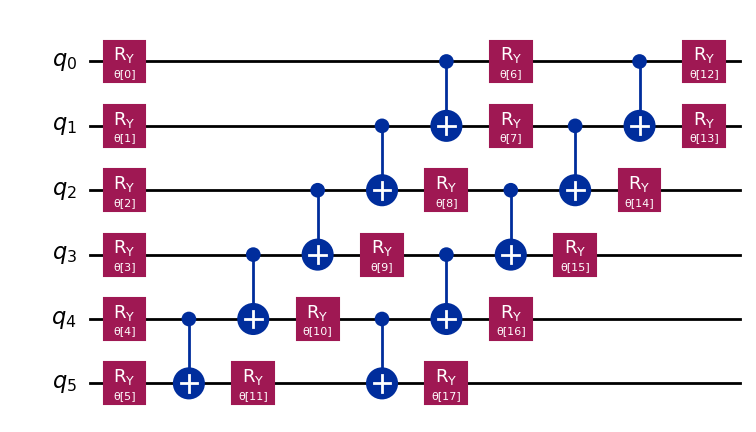

In [43]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

In [44]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [45]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

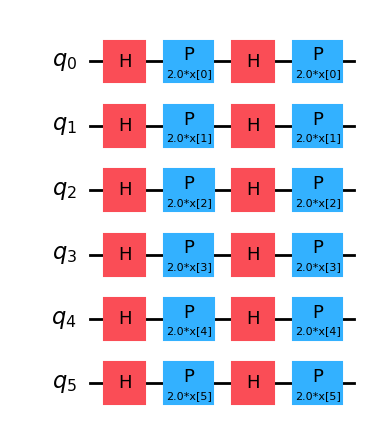

In [46]:
from qiskit.circuit.library import ZFeatureMap
import matplotlib.pyplot as plt
num_features = features.shape[1]
feature_map = ZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", fold=20)

In [47]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [48]:
!pip install qiskit-machine-learning

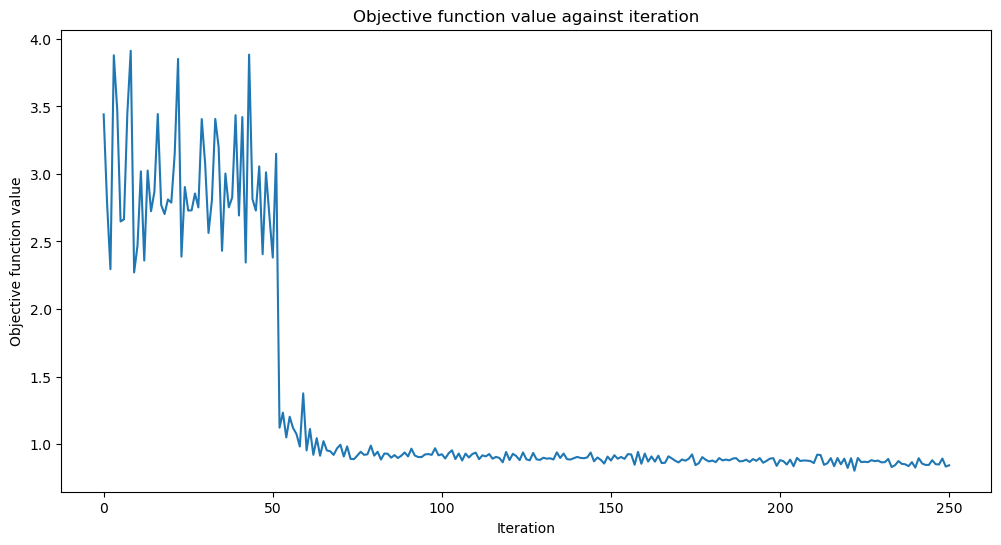

Training time: 6428 seconds


In [49]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [50]:
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

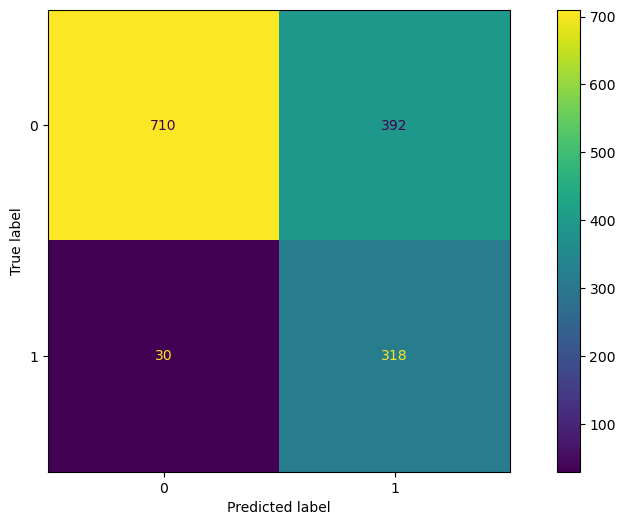

In [51]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion2).plot()
#sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
#plot.xlabel("Predict values")
#plot.ylabel("Real values")
#plot.title("Confusion Matrix (VQC)")
#plot.show()

In [52]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.77
Quantum VQC on the test dataset:     0.71


In [53]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.959459  0.644283  0.770901      1102
           1   0.447887  0.913793  0.601134       348

    accuracy                       0.708966      1450
   macro avg   0.703673  0.779038  0.686018      1450
weighted avg   0.836682  0.708966  0.730157      1450



Utilizando Pegasus

In [54]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

In [55]:
import numpy as np
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

In [56]:
# number of qubits is equal to the number of features
num_qubits = len(features.columns)

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000

In [57]:
#from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [58]:
from qiskit_machine_learning.algorithms import PegasosQSVC
import time
np.random.seed(123)
pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
start = time.time()
pegasos_qsvc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

# testing
pegasos_score = pegasos_qsvc.score(X_test_np, y_test_np)
print(f"PegasosQSVC classification test score: {pegasos_score}")

Training time: 8 seconds
PegasosQSVC classification test score: 0.7655172413793103


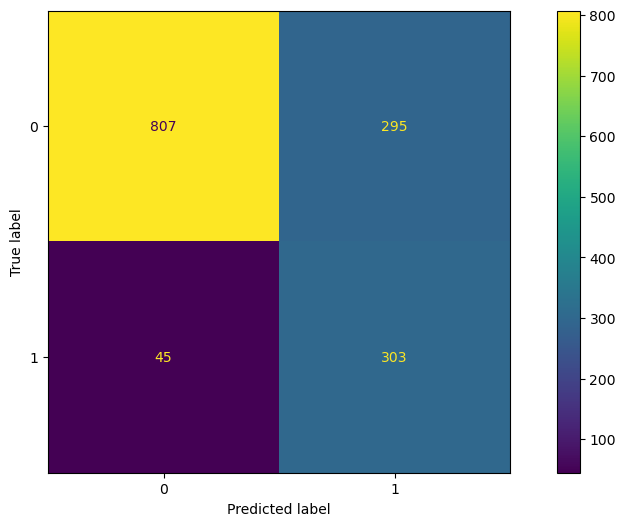

In [59]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.metrics import confusion_matrix
q_predictions = pegasos_qsvc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion2).plot()
#sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
#plot.xlabel("Predict values")
#plot.ylabel("Real values")
#plot.title("Confusion Matrix (PegasusQSVC)")
#plot.show()

In [60]:
train_score_q4 = pegasos_qsvc.score(X_train_np, y_train_np)
test_score_q4 = pegasos_qsvc.score(X_test_np, y_test_np)

print(f"Quantum PQSVC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum PQSVC on the test dataset:     {test_score_q4:.2f}")

Quantum PQSVC on the training dataset: 0.79
Quantum PQSVC on the test dataset:     0.77


In [61]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.947183  0.732305  0.825998      1102
           1   0.506689  0.870690  0.640592       348

    accuracy                       0.765517      1450
   macro avg   0.726936  0.801497  0.733295      1450
weighted avg   0.841465  0.765517  0.781501      1450

